# Amazon Alexa Reviews

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
#loading the dataset
data=pd.read_csv("C:\\Users\\Arindam\\Documents\\Downloads\\archive (14)\\amazon_alexa.tsv",sep='\t')

In [3]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
data.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [5]:
#shape of data
data.shape

(3150, 5)

In [6]:
#getting information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
#checking for null values
data.isnull().any()

rating              False
date                False
variation           False
verified_reviews    False
feedback            False
dtype: bool

In [8]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [9]:
#creating a feature of length of verified reviews
data['length']=data['verified_reviews'].apply(len)                            

In [10]:
print(data.shape)
data.head()

(3150, 6)


,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [11]:
#grouping by rating
data.groupby('rating').describe()

feedback                                     length              \
          count mean  std  min  25%  50%  75%  max   count        mean   
rating                                                                   
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   161.0  195.000000   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    96.0  249.187500   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   152.0  207.296053   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   455.0  178.520879   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  2286.0  108.444007   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.371226  1.0  36.00  120.0  284.00  1124.0  
2       269.595303  1.0  78.75  163.0  309.25  1686.0  
3       272.194706  1.0  54.00  130.0  284.00  1954.0  
4       215.927849  1.0  34.00   99.0  241.00  1360.0  
5       152.116387  1.0  26.00   64.0  135.00  2851.0

In [12]:
#grouping by feedback
data.groupby('feedback').describe()

rating                                               length  \
           count      mean       std  min  25%  50%  75%  max   count   
feedback                                                                
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0   257.0   
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0  2893.0   

                                                                   
                mean         std  min   25%    50%    75%     max  
feedback                                                           
0         215.241245  236.325955  1.0  53.0  137.0  289.0  1686.0  
1         124.659177  174.624491  1.0  29.0   69.0  154.0  2851.0

In [13]:
#ratibgs count
data['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

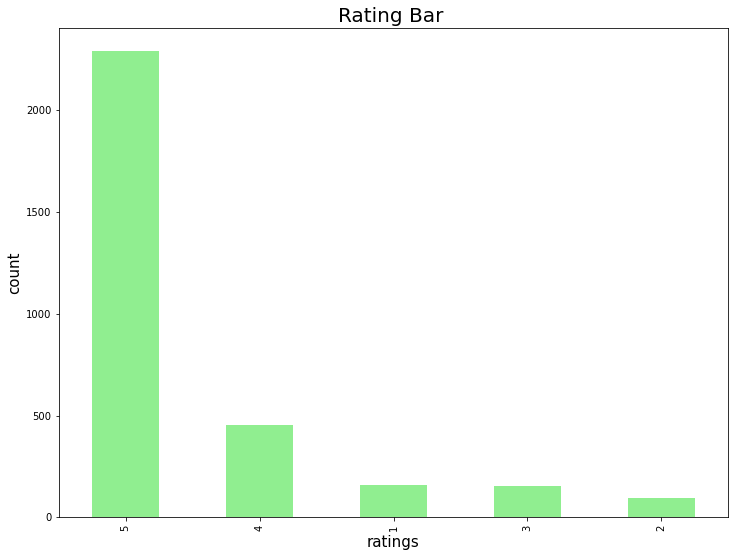

In [14]:
#visualizing ratings
plt.figure(figsize=(12,9))
data['rating'].value_counts().plot.bar(color = 'lightgreen')
plt.title('Rating Bar ',fontsize=20)
plt.xlabel('ratings',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

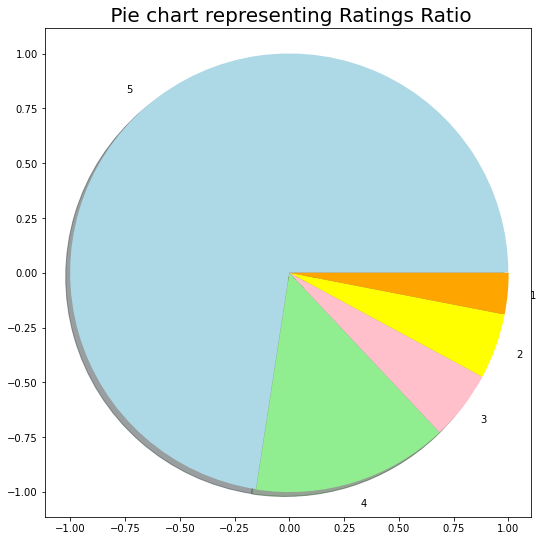

In [15]:
#pie chart representing Ratings ratio
labels = '5', '4', '3', '2', '1'
sizes = [2286, 455, 161, 152, 96]
colors = ['lightblue', 'lightgreen', 'pink', 'yellow', 'orange']
explode = [0.001, 0.001, 0.001, 0.001, 0.001]
plt.figure(figsize=(12,9))
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True,frame=True)
plt.title(' Pie chart representing Ratings Ratio',fontsize=20,)
plt.show()

In [16]:
#variation count
data['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

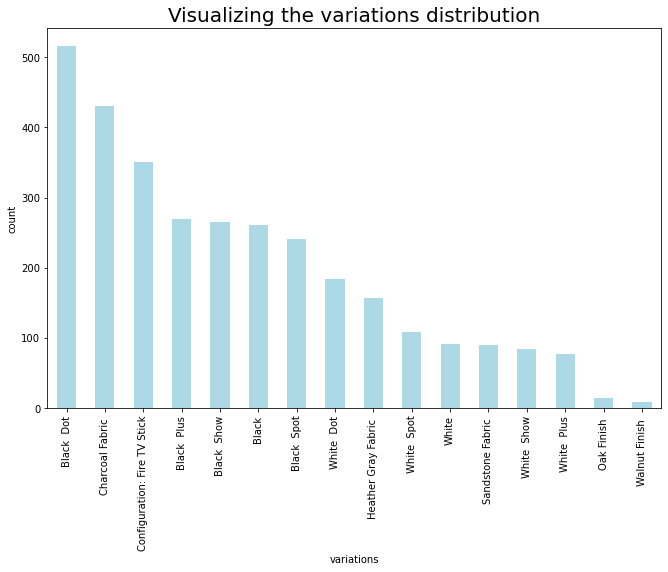

In [17]:
#visualizing the variation distribution
data['variation'].value_counts().plot.bar(color='lightblue', figsize = (11, 7))
plt.title('Visualizing the variations distribution',fontsize=20)
plt.xlabel('variations',fontsize=10)
plt.ylabel('count',fontsize=10)
plt.show()

In [18]:
#feedback count
data['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

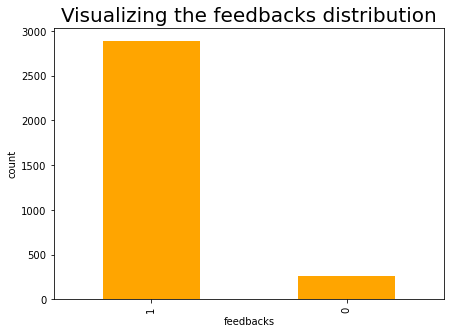

In [19]:
#visualizing the feedback distribution
data['feedback'].value_counts().plot.bar(color = 'orange', figsize = (7, 5))
plt.title('Visualizing the feedbacks distribution',fontsize=20)
plt.xlabel('feedbacks')
plt.ylabel('count')
plt.show()

In [20]:
#considering length
data['length'].describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

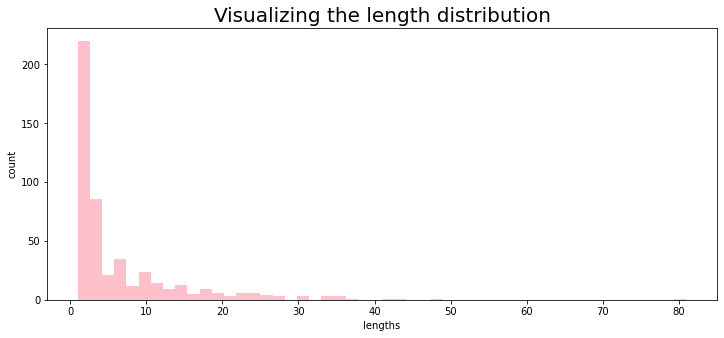

In [21]:
#visualizing the length distribution
data['length'].value_counts().plot.hist(color = 'pink', figsize = (12, 5), bins = 50)
plt.title('Visualizing the length distribution',fontsize=20)
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

In [22]:
data[data['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [23]:
data[data['length'] == 21]['verified_reviews'].iloc[0]

'Good sound works well'

In [24]:
data[data['length']==2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [25]:
data['date'].describe()

count          3150
unique           77
top       30-Jul-18
freq           1603
Name: date, dtype: object

In [26]:
data['date'].value_counts()

30-Jul-18    1603
29-Jul-18     482
28-Jul-18     250
26-Jul-18      85
31-Jul-18      81
             ... 
2-Jun-18        2
9-Jun-18        1
29-May-18       1
4-Jun-18        1
13-Jun-18       1
Name: date, Length: 77, dtype: int64

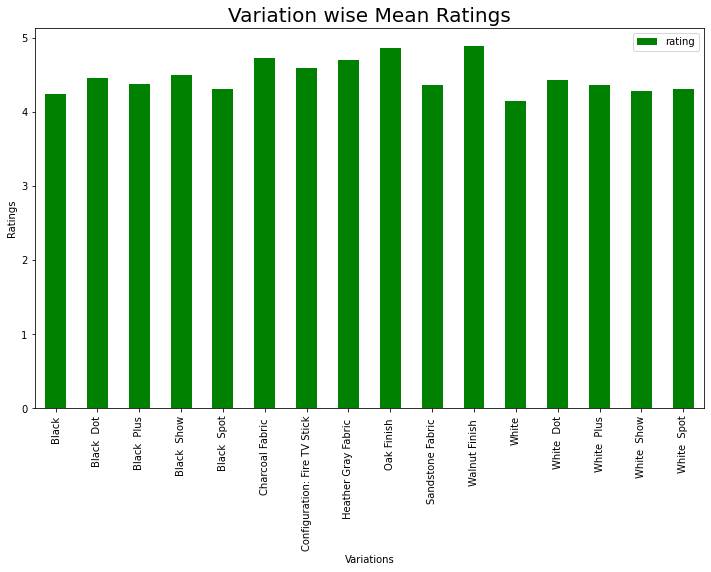

In [27]:
#variation wise mean ratings
data.groupby('variation').mean()[['rating']].plot.bar(color='green',figsize=(12,7))
plt.title("Variation wise Mean Ratings",fontsize=20)
plt.xlabel('Variations')
plt.ylabel('Ratings')
plt.show()

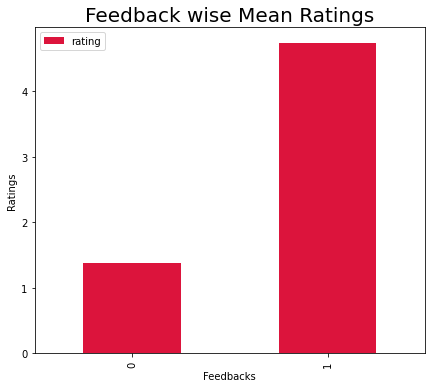

In [28]:
#Feedback wise Mean Ratings
data.groupby('feedback').mean()[['rating']].plot.bar(color = 'crimson', figsize=(7, 6))
plt.title("Feedback wise Mean Ratings",fontsize=20)
plt.xlabel('Feedbacks')
plt.ylabel('Ratings')
plt.show()

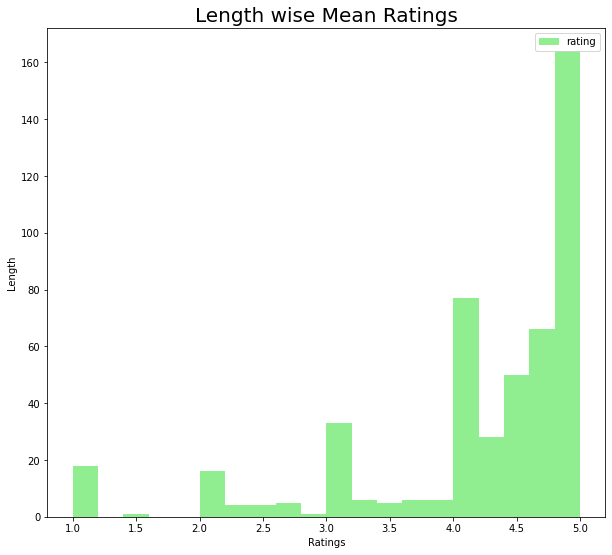

In [29]:
#Length wise Mean Ratings
data.groupby('length').mean()[['rating']].plot.hist(color = 'lightgreen', figsize=(10, 9), bins = 20)
plt.title("Length wise Mean Ratings",fontsize=20)
plt.xlabel('Ratings')
plt.ylabel('Length')
plt.show()

In [30]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)
word_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
word_freq=sorted(word_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(word_freq, columns=['word', 'freq'])
frequency.head(20)

,word,freq
0,love,956
1,echo,839
2,great,729
3,alexa,632
4,music,540
5,like,504
6,use,469
7,works,381
8,easy,342
9,sound,340


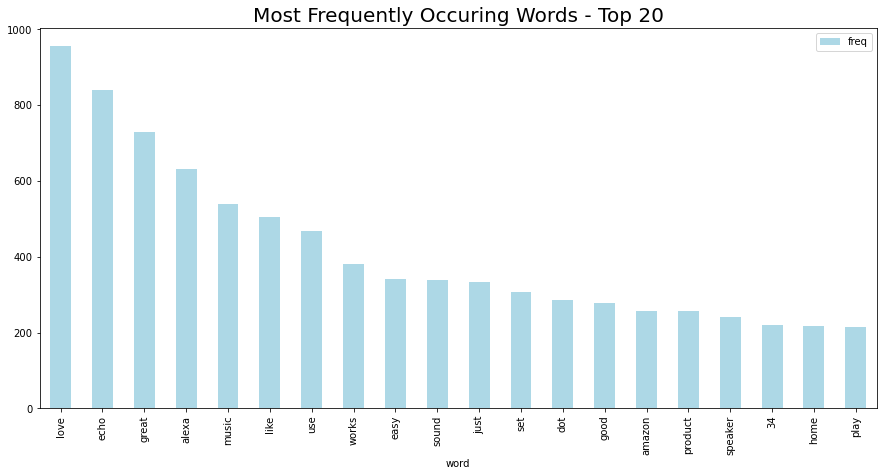

In [31]:
#Most Frequently Occuring Words - Top 20
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'lightblue')
plt.title("Most Frequently Occuring Words - Top 20",fontsize=20)
plt.show()

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

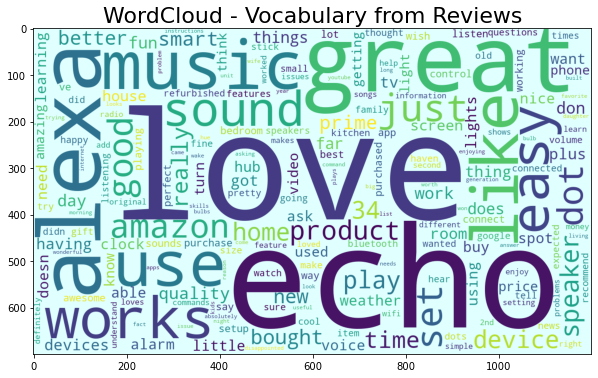

In [32]:

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 1200, height = 700).generate_from_frequencies(dict(word_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [33]:
#importing libraries for natural language processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [34]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [35]:
#port stemming
port_stem = PorterStemmer()
corpus=[]
def stemming(content):
    #removing special character
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    # change to lower case
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    # remove stop words
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    # join words to make sentence
    stemmed_content = ' '.join(stemmed_content)
    corpus.append(stemmed_content)

In [36]:
data['verified_reviews'].apply(stemming)

0       None
1       None
2       None
3       None
4       None
        ... 
3145    None
3146    None
3147    None
3148    None
3149    None
Name: verified_reviews, Length: 3150, dtype: object

In [37]:
data['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)

x = cv.fit_transform(corpus).toarray()

y = data.iloc[:, 4].values

print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [39]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [40]:
print(y)

[1 1 1 ... 1 1 1]


In [41]:
#splitting the dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2205, 2500)
(2205,)
(945, 2500)
(945,)


In [42]:
#applying minmax scaling
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

#### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)
x_train_prediction = lr.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
y_pred = lr.predict(x_test)
testing_data_accuracy = accuracy_score(y_pred, y_test)
print('MODEL : LOGISTIC REGRESSION')
print('training_data_accuracy  ', training_data_accuracy)
print('testing_data_accuracy  ', testing_data_accuracy)

MODEL : LOGISTIC REGRESSION
training_data_accuracy   0.964625850340136
testing_data_accuracy   0.9343915343915344


In [45]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 18  57]
 [  5 865]]


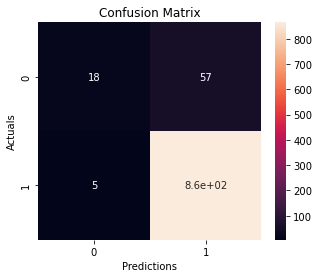

In [46]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("Actuals")
plt.title("Confusion Matrix", fontsize=12)
plt.show()

In [47]:
#hyper parameter training
from sklearn.model_selection import cross_val_score
lr_cv = cross_val_score(LogisticRegression(), x, y, cv = 7)
print("Accuracy: {:.2} (+/- {:.2})".format(lr_cv.mean(), lr_cv.std() )) 

Accuracy: 0.93 (+/- 0.0093)


#### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
x_train_prediction = rfc.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
y_pred = rfc.predict(x_test)
testing_data_accuracy = accuracy_score(y_pred, y_test)
print('MODEL : RandomForestClassifier')
print('training_data_accuracy  ', training_data_accuracy)
print('testing_data_accuracy  ', testing_data_accuracy)

MODEL : RandomForestClassifier
training_data_accuracy   0.9941043083900227
testing_data_accuracy   0.9365079365079365


In [49]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 20  55]
 [  5 865]]


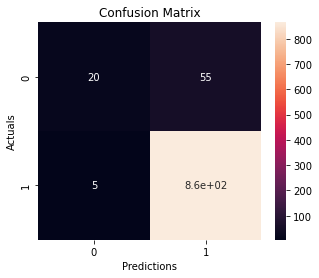

In [50]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("Actuals")
plt.title("Confusion Matrix", fontsize=12)
plt.show()

In [51]:
rfc_cv = cross_val_score(rfc, x, y, cv = 10)
print("Accuracy: {:.2} (+/- {:.2})".format(rfc_cv.mean(), rfc_cv.std() )) 

Accuracy: 0.94 (+/- 0.029)


#### XGBoost Regression

In [52]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
x_train_prediction = xgb.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
y_pred_xgb = xgb.predict(x_test)
testing_data_accuracy = accuracy_score(y_pred, y_test)
print('MODEL : XGBClassifier')
print('training_data_accuracy  ', training_data_accuracy)
print('testing_data_accuracy  ', testing_data_accuracy)

[22:38:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
MODEL : XGBClassifier
training_data_accuracy   0.9705215419501134
testing_data_accuracy   0.9365079365079365


In [53]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 20  55]
 [  5 865]]


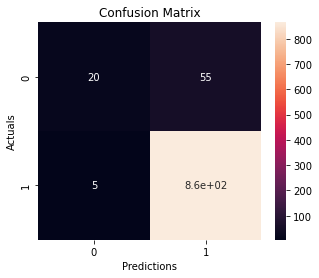

In [54]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("Actuals")
plt.title("Confusion Matrix", fontsize=12)
plt.show()

In [55]:
xgb_cv = cross_val_score(xgb, x, y, cv = 7)
print("Accuracy: {:.2} (+/- {:.2})".format(xgb_cv.mean(), xgb_cv.std() )) 

[22:38:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:38:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:39:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

#### Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
x_train_prediction = dtc.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
y_pred = dtc.predict(x_test)
testing_data_accuracy = accuracy_score(y_pred, y_test)
print('MODEL : DecisionTreeClassifier')
print('training_data_accuracy  ', training_data_accuracy)
print('testing_data_accuracy  ', testing_data_accuracy)

MODEL : DecisionTreeClassifier
training_data_accuracy   0.9941043083900227
testing_data_accuracy   0.9132275132275133


In [57]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 31  44]
 [ 38 832]]


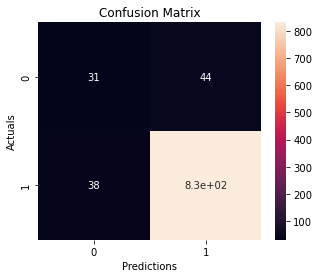

In [58]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("Actuals")
plt.title("Confusion Matrix", fontsize=12)
plt.show()

In [59]:
#predicting using xgbRegressor
review = x_test[3]
print(y_test[3])
print(y_pred_xgb[3])



1
1
